In [1]:
import pandas as pd
import numpy as np
types = {'age' : int, ##useful
    'class_of_worker' : str, ##only 50% filled
    'industry code' : int, ## useful but needs decoding and one-hotting
    'adjusted gross income' : int, ##should be useful but does not explain anything about it
    'education' : str, ##Should be useful
    'wage per hour' : int, ##Should be useful but 0 is the same as not populated/not in universe which makes it very problematic. implied decimal places
    'enrolled in uni inst last wk' : str, ##Way too sparsely populated to be useful
    'marital status' : str, ##Might be a proxy for age, but also a general proxy for something like stability
    'major industry code' : str, #Relatively well populated, but might have significant performance gaps for each class as earnings only partially related to industry. Also null = children not the smae
    'major occupation code' : str, ##Similar to occupation - perhaps more weight as competition may vary between industry more than occupation
    'mace' : str,  ##Very well populated - might be difficult with lower populated races
    'hispanic origin' : str, ##has very low population except for all other and mexico - don't want to use
    'sex' : str, ##Given gender imbalance this is very good - may also provide some proxy for things like occupation and industry
    'union' : str, ##Poorly populated do not use
    'reason for unemployment' : str, ##Poorly populated do not use
    'full or part time' : str, ##Well populated for 3 categories can use
    'capital gains' : int, ##cap gains and losses are sparsely populated though would like to use them
    'capital losses' : int,
    'stock dividends' : int, ## INVE 
    'fed tax liability' : str, ##seems to have good properties, keep
    'previous residence region' : str, ##not well populated do not use
    'previous residence state' : str, ##not well populated do not use
    'detailed family' : str, ##Too detailed and not enough data to justify
    'detailed household' : str, ##Better than above, good to use
    'instance weight' : float, ##Not really sure how this works so will not use
    'migration code-change in msa' : str, ##Not well populated outside of main 2 areas
    'migration code-change in reg' : str, ##Not well populated outside of main 2 areas
    'migration code-move within reg' : str, ##Not well populated outside of main 2 areas
    'live in this house 1 year ago' : str, ##Mostly not populated but could be useful
    'migration prev res sunbelt' : str, ##Not well populated for interesting results
    'num persons worked for employer' : int, ##Good to use, though lots not in universe. Still very useful
    'family while child' : str, ##because of population style actively not useful
    'father birth country' : str, ##Too sparsely populated
    'mother birth country' : str, ##Too sparsely populated
    'self birth country' : str, ##Too sparesely populated. Map to US/non-us?. Could also in future map to something like HDI or have some other values
    ##To discuss how where you emigrate from affects your development (e.g. People who emigrate from Cuba/Germany vs. Puerto Rico)
    'citizenship' : str, ##Quite poorly populated - might map to citizen/non-citizen
    'own  business' : int, ##Not useful
    'fill inc vet questions' : str, ##Sparsely populated
    'vets benefits' : int, ##Sparsely populated
    'weeks worked/year' : float, ##Well populated for either 0 or 52 else sparsely populated - could be useful
    'year' : int, ##Not useful
    '50k' : str ##target variable
}
column_names = ['age', 'class_of_worker', 'industry code', 'adjusted gross income', 'education', 'wage per hour', 'enrolled in uni inst last wk',
    'marital status', 'major industry code', 'major occupation code', 'mace', 'hispanic origin', 'sex', 'union', 'reason for unemployment', 'full or part time',
    'capital gains', 'capital losses', 'stock dividends', 'fed tax liability', 'previous residence region', 'previous residence state', 'detailed family',
    'detailed household', 'instance weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg',
    'live in this house 1 year ago', 'migration prev res sunbelt', 'num persons worked for employer', 'family while child', 'father birth country',
    'mother birth country', 'self birth country', 'citizenship', 'own  business', 'fill inc vet questions', 'vets benefits', 'weeks worked/year',
    'year', '50k']
train_data = pd.read_csv('C:\\Users\\barre\\Downloads\\census_income_learn.csv', dtype = types, names = column_names)
test_data = pd.read_csv('C:\\Users\\barre\\Downloads\\census_income_test.csv', dtype = types, names = column_names)




In [13]:
##Data fix function
def fix_data(dataframe):
    ##Stripping whitespace because it makes things worse
    dataframe = dataframe.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    dataframe.drop(columns = ['class_of_worker', 'enrolled in uni inst last wk', 'union', 'previous residence state', 'previous residence region', 'migration prev res sunbelt', 'fill inc vet questions', 'vets benefits', 'year'])
    return dataframe


,age,class_of_worker,industry code,adjusted gross income,education,wage per hour,enrolled in uni inst last wk,marital status,major industry code,major occupation code,...,father birth country,mother birth country,self birth country,citizenship,own business,fill inc vet questions,vets benefits,weeks worked/year,year,50k
20416,16,Private,32,18,10th grade,0,High school,Never married,Wholesale trade,Sales,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52.0,94,1
97025,17,Self-employed-incorporated,33,42,10th grade,0,High school,Never married,Retail trade,Handlers equip cleaners etc,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,24.0,95,1


In [15]:
#Age is a well populated field and I expect it to be useful. Hard to work out how accurate it is though. I am tempted to drop all children under 14 as they can never earn money.
train_data['age'].value_counts().sum()
train_data['age'].value_counts().sort_index()


199523

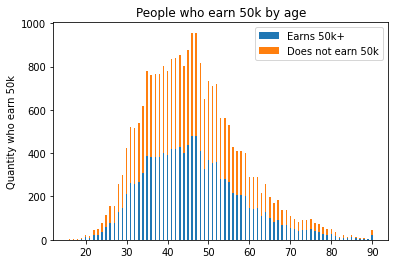

In [15]:
import matplotlib.pyplot as plt
yes_vals = fixed_train_data[fixed_train_data['50k_1'] == 1]['age'].value_counts().sort_index()
no_vals = fixed_train_data[fixed_train_data['50k_1'] == 1]['age'].value_counts().sort_index()
fig, ax = plt.subplots()
ax.bar(yes_vals.index.values.tolist(), yes_vals, 0.35, label = 'Earns 50k+')
ax.bar(no_vals.index.values.tolist(), no_vals, 0.35, label = 'Does not earn 50k', bottom = yes_vals)
ax.set_ylabel('Quantity who earn 50k')
ax.set_title('People who earn 50k by age')
ax.legend()


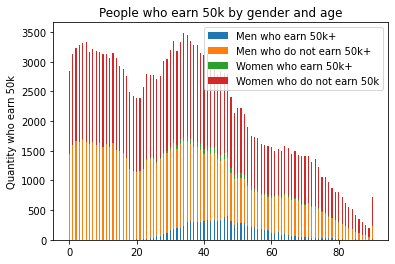

In [62]:
age_sex_df = pd.DataFrame(index = fixed_train_data['age'].value_counts().sort_index().index.values)
age_sex_df['m_yes'] = fixed_train_data[(fixed_train_data['50k_1'] == 1) & (fixed_train_data['Male'] == 1)]['age'].value_counts().sort_index()
age_sex_df['m_no'] = fixed_train_data[(fixed_train_data['50k_1'] == 0) & (fixed_train_data['Male'] == 1)]['age'].value_counts().sort_index()
age_sex_df['f_yes'] = fixed_train_data[(fixed_train_data['50k_1'] == 1) & (fixed_train_data['Female'] == 1)]['age'].value_counts().sort_index()
age_sex_df['f_no'] = fixed_train_data[(fixed_train_data['50k_1'] == 0) & (fixed_train_data['Female'] == 1)]['age'].value_counts().sort_index()
n_fig, n_ax = plt.subplots()
age_sex_df.fillna(0, inplace = True)
n_ax.bar(age_sex_df.index.values.tolist(), age_sex_df['m_yes'], 0.35, label = 'Men who earn 50k+')
n_ax.bar(age_sex_df.index.values.tolist(), age_sex_df['m_no'], 0.35, label = 'Men who do not earn 50k+', bottom = age_sex_df['m_yes'])
n_ax.bar(age_sex_df.index.values.tolist(), age_sex_df['f_yes'], 0.35, label = 'Women who earn 50k+', bottom = age_sex_df['m_yes'] + age_sex_df['m_no'])
n_ax.bar(age_sex_df.index.values.tolist(), age_sex_df['f_no'], 0.35, label = 'Women who do not earn 50k', bottom = age_sex_df['m_no'] + age_sex_df['m_yes'] + age_sex_df['f_yes'])
n_ax.set_ylabel('Quantity who earn 50k')
n_ax.set_title('People who earn 50k by gender and age')
n_ax.legend()

In [28]:
train_data['class_of_worker'].value_counts().sum() ##Each is filled
train_data['class_of_worker'].value_counts()
train_data['class_of_worker'][train_data['class_of_worker'] != ' Not in universe'].value_counts().sum() ##Shows approx half individuals did not fill this in correctly

 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: class_of_worker, dtype: int64

In [29]:
##Calculating how many for each column are not in universe
##Generally we have high data quality. Data quality of some columns is so low I will not use it.
##Particularly the class_of_worker, enrolled in uni inst last wk, union. Reason for unemployment will be kept because it might be incredibly high correlation. though will be dropped quickly
##previous region data, family whilst child, and veteran related questions. This is mostly to save time
for i in train_data.columns:
    print(i + ': ', train_data[i][train_data[i] != ' Not in universe'].value_counts().sum() / train_data.shape[0])

age:  1.0
class_of_worker:  0.49757672047834084
industry code:  1.0
adjusted gross income:  1.0
education:  1.0
wage per hour:  1.0
enrolled in uni inst last wk:  0.06305037514472016
marital status:  1.0
major industry code:  1.0
major occupation code:  0.4953764728878375
mace:  1.0
hispanic origin:  1.0
sex:  1.0
union:  0.09554788169784938
reason for unemployment:  0.030422557800353845
full or part time:  1.0
capital gains:  1.0
capital losses:  1.0
stock dividends:  1.0
fed tax liability:  1.0
previous residence region:  0.07905354269933793
previous residence state:  0.07905354269933793
detailed family:  1.0
detailed household:  1.0
instance weight:  1.0
migration code-change in msa:  0.9924018784801752
migration code-change in reg:  0.9924018784801752
migration code-move within reg:  0.9924018784801752
live in this house 1 year ago:  1.0
migration prev res sunbelt:  0.5787252597444906
num persons worked for employer:  1.0
family while child:  0.2771159214727124
father birth country

<AxesSubplot:>

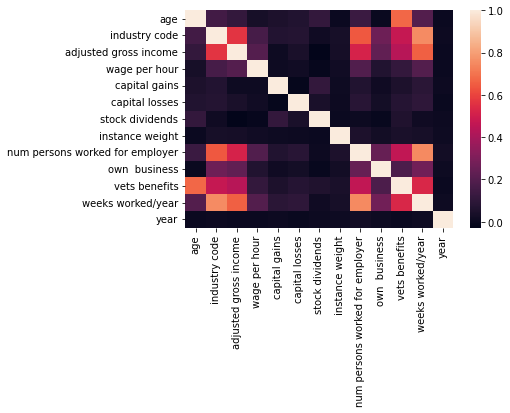

In [30]:
##finding a correlation graph
import seaborn as sns
corr = test_data.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels= corr.columns)
##This shows that there are very few truly redundant variables in that there is always a low correlation between the variables that are like that
##I note that there are duplicate rows of data but that they don't necessarily

In [18]:
for i in test_data.columns:
    print(str(i) + ': ')
    for j in test_data[i].value_counts().index:
        if train_data[i][train_data[i] == j].shape[0] != 0 and type(j) != float:
            print('   ' + str(j) + ': ', train_data[i][(train_data[i] == j) & (train_data['50k_1'] == 1)].shape[0] / train_data[i][train_data[i] == j].shape[0], ', ', train_data[i][train_data[i] == j].shape[0])

age: 
   33:  0.08053892215568863 ,  3340
   34:  0.0885640584694755 ,  3489
   4:  0.0 ,  3318
   35:  0.1127536231884058 ,  3450
   3:  0.0 ,  3279
   37:  0.11653447223917023 ,  3278
   5:  0.0 ,  3332
   38:  0.11687519072322246 ,  3277
   32:  0.08124215809284818 ,  3188
   30:  0.06587574149235093 ,  3203
   7:  0.0 ,  3218
   31:  0.07758877946881527 ,  3351
   39:  0.12786259541984732 ,  3144
   40:  0.1252408477842004 ,  3114
   12:  0.0 ,  3060
   36:  0.11333134506412168 ,  3353
   14:  0.0 ,  3068
   8:  0.0 ,  3187
   11:  0.0 ,  3128
   2:  0.0 ,  3236
   13:  0.0 ,  3152
   42:  0.13989983305509182 ,  2995
   6:  0.0 ,  3171
   41:  0.1333758774728781 ,  3134
   10:  0.0 ,  3134
   9:  0.0 ,  3162
   1:  0.0 ,  3138
   28:  0.04281447062728178 ,  3013
   27:  0.027918781725888325 ,  2758
   15:  0.0 ,  2926
   29:  0.04885245901639344 ,  3050
   0:  0.0 ,  2839
   24:  0.013654329859863456 ,  2783
   44:  0.14429289303661164 ,  2786
   43:  0.14780200761509174 ,  2889
  

In [2]:
train_data['50k'].value_counts()

 - 50000.    187141
 50000+.      12382
Name: 50k, dtype: int64

In [4]:
train_data['50k_1'] = train_data['50k'].map(lambda x: 1 if x == ' 50000+.' else 0)
train_data['50k_1'].value_counts()

0    187141
1     12382
Name: 50k_1, dtype: int64

In [10]:
train_data['wage per hour_2'] = train_data['wage per hour'].map(lambda x: x / 100)
train_data['wage per hour_2'].value_counts()

0.00     188219
5.00        734
6.00        546
7.00        534
8.00        507
          ...  
11.99         1
86.00         1
18.62         1
22.99         1
10.92         1
Name: wage per hour_2, Length: 1240, dtype: int64

In [12]:
train_data['industry_test'] = train_data['major industry code'] + ' - ' + train_data['major occupation code']
train_data['industry_test'].value_counts()

 Not in universe or children -  Not in universe                   100684
 Retail trade -  Sales                                              7188
 Education -  Professional specialty                                4406
 Retail trade -  Other service                                      4082
 Construction -  Precision production craft & repair                3444
                                                                   ...  
 Private household services -  Protective services                     1
 Forestry and fisheries -  Precision production craft & repair         1
 Forestry and fisheries -  Sales                                       1
 Private household services -  Technicians and related support         1
 Communications -  Machine operators assmblrs & inspctrs               1
Name: industry_test, Length: 263, dtype: int64

In [25]:
stock_divs = train_data[train_data['stock dividends'] > 0]


0        178382
100        1148
500        1030
1000        894
200         866
          ...  
2746          1
116           1
12173         1
3896          1
7958          1
Name: stock dividends, Length: 1478, dtype: int64

In [2]:
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
train_data['50k_1'] = train_data['50k'].map(lambda x: 1 if x == ' 50000+.' else 0)
test_data['50k_1'] = test_data['50k'].map(lambda x: 1 if x == ' 50000+.' else 0)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
X_train = train_data[['capital losses']]
y_train = train_data['50k_1']
logmodel.fit(X_train,y_train)
X_test = test_data[['capital losses']]
predictions = logmodel.predict(X_test)


In [10]:
y_test = test_data['50k_1']
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
##There is a low predictive ability of just the 3 variables stock dividends, capital gains and capital losses.
##This is to be expected (it would be a bad problem if data was predictive from a minimal amount of data)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     93576
           1       0.42      0.00      0.01      6186

    accuracy                           0.94     99762
   macro avg       0.68      0.50      0.49     99762
weighted avg       0.91      0.94      0.91     99762



Data Cleaning and prep for model:


In [3]:
##Data fix function
def fix_data(dataframe):
    ##Stripping whitespace because it makes things worse
    dataframe['50k_1'] = dataframe['50k'].map(lambda x: 1 if x == ' 50000+.' else 0)
    dataframe = dataframe.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    dataframe.drop(columns = [
        'class_of_worker',
        'industry code',
        'adjusted gross income',
        'wage per hour',
        'enrolled in uni inst last wk',
        'hispanic origin',
        'union',
        'reason for unemployment',
        'previous residence region',
        'previous residence state',
        'detailed family',
        'instance weight',
        'migration code-change in msa',
        'migration code-change in reg',
        'migration code-move within reg',
        'migration prev res sunbelt',
        'family while child',
        'father birth country',
        'mother birth country',
        'self birth country',
        'own  business',
        'fill inc vet questions',
        'vets benefits',
        'year',
        '50k'      
    ], inplace = True)
    dataframe['education'] = dataframe['education'].map(
    {'less than 1st grade' : 0,
    '1st 2nd 3rd or 4th grade' : 0,
    '5th or 6th grade' : 0,
    'Children' : 0,
    '7th and 8th grade' : 0,
    '9th grade' : 1,
    '10th grade' : 1,
    '11th grade' : 1,
    '12th grade no diploma' : 2,
    'High school graduate' : 3,
    'Some college but no degree' : 4,
    'Associates degree-occup /vocational' : 5,
    'Associates degree-academic program' : 5,
    'Bachelors degree(BA AB BS)' : 6,
    'Masters degree(MA MS MEng MEd MSW MBA)' : 7,
    'Prof school degree(MD DDS DVM LLB JD' : 8,
    'Doctorate degree(PhD EdD)' : 8
    })
    print(dataframe.shape)
    one_hot = pd.get_dummies(dataframe['marital status'])
    dataframe = dataframe.drop(columns = ['marital status'])
    dataframe = pd.merge(left = dataframe, right = one_hot, left_index = True, right_index = True)
    print(dataframe.shape)
    one_hot = pd.get_dummies(dataframe['major industry code'])
    dataframe = dataframe.drop(columns = ['major industry code'])
    dataframe = pd.merge(left = dataframe, right = one_hot, left_index = True, right_index = True)
    print(dataframe.shape)
    one_hot = pd.get_dummies(dataframe['major occupation code'])
    dataframe = dataframe.drop(columns = ['major occupation code'])
    dataframe = pd.merge(left = dataframe, right = one_hot, left_index = True, right_index = True)
    print(dataframe.shape)
    one_hot = pd.get_dummies(dataframe['mace'])
    dataframe = dataframe.drop(columns = ['mace'])
    dataframe = pd.merge(left = dataframe, right = one_hot, left_index = True, right_index = True)
    print(dataframe.shape)
    one_hot = pd.get_dummies(dataframe['sex'])
    dataframe = dataframe.drop(columns = ['sex'])
    dataframe = pd.merge(left = dataframe, right = one_hot, left_index = True, right_index = True)
    print(dataframe.shape)
    dataframe['full or part time'] = dataframe['full or part time'].map(
    {'Children or Armed Forces' : 'NW',
    'Full-time schedules' : 'FT',
    'Not in labor force' : 'NW',
    'PT for non-econ reasons usually FT' : 'PT',
    'Unemployed full-time' : 'NW',
    'PT for econ reasons usually PT' : 'PT',
    'Unemployed part- time' : 'NW',
    'PT for econ reasons usually FT' : 'PT'}
)
    one_hot = pd.get_dummies(dataframe['full or part time'])
    dataframe = dataframe.drop(columns = ['full or part time'])
    dataframe = pd.merge(left = dataframe, right = one_hot, left_index = True, right_index = True)
    print(dataframe.shape)
    one_hot = pd.get_dummies(dataframe['fed tax liability'])
    dataframe = dataframe.drop(columns = ['fed tax liability'])
    dataframe = pd.merge(left = dataframe, right = one_hot, left_index = True, right_index = True)
    dataframe['detailed household'] = dataframe['detailed household'].map({
    'Householder' : 'Householder',
    'Child under 18 never married': 'Child',
    'Spouse of householder' : 'Depend Adult',
    'Child 18 or older' : 'Child',
    'Other relative of householder' : 'Depend Adult',
    'Nonrelative of householder' : 'Depend Adult',
    'Group Quarters- Secondary individual' : 'Depend Adult',
    'Child under 18 ever married' : 'Child'
    })
    one_hot = pd.get_dummies(dataframe['detailed household'])
    dataframe = dataframe.drop(columns = ['detailed household'])
    dataframe = pd.merge(left = dataframe, right = one_hot, left_index = True, right_index = True)
    one_hot = pd.get_dummies(dataframe['live in this house 1 year ago'])
    dataframe = dataframe.drop(columns = ['live in this house 1 year ago'])
    dataframe = pd.merge(left = dataframe, right = one_hot, left_index = True, right_index = True)
    dataframe['num persons worked for employer'] = dataframe['num persons worked for employer'].map({
    0 : 0,
    1 : 5,
    2 : 17,
    3 : 62,
    4 : 300,
    5 : 750,
    6 : 1500
})
    dataframe['citizenship'] = dataframe['citizenship'].map({'Native- Born in the United States' : 2,
    'Foreign born- Not a citizen of U S' : 0,
    'Foreign born- U S citizen by naturalization' : 1,
    'Native- Born abroad of American Parent(s)' : 2,
    'Native- Born in Puerto Rico or U S Outlying' : 2})
    dataframe['weeks worked/year'] = dataframe['weeks worked/year'].map(lambda x: 0 if x == 0 else 2 if x >= 40 else 1)
    dataframe['education'] = dataframe['education'].fillna(0)
    return dataframe


fixed_train_data = fix_data(train_data)
fixed_test_data = fix_data(test_data)

(199523, 18)
(199523, 24)
(199523, 47)
(199523, 61)
(199523, 65)
(199523, 66)
(199523, 68)
(99762, 18)
(99762, 24)
(99762, 47)
(99762, 61)
(99762, 65)
(99762, 66)
(99762, 68)


In [8]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

classifiers = [KNeighborsClassifier(3),
DecisionTreeClassifier(),
RandomForestClassifier(),
GaussianNB()]


In [5]:
x_train, y_train = fixed_train_data.drop(columns = ['50k_1']), fixed_train_data['50k_1']
x_test, y_test = fixed_test_data.drop(columns = ['50k_1']), fixed_test_data['50k_1']

In [9]:
for clf in classifiers:
    print(clf)
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    conf_mat = confusion_matrix(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    print('Confusion Matrix: ', conf_mat)
    train_predictions = clf.predict_proba(x_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
print("="*30)

KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier
****Results****
Accuracy: 94.2944%
Confusion Matrix:  [[91633  1943]
 [ 3749  2437]]
Log Loss: 0.9274832202657556
DecisionTreeClassifier()


C:\Users\barre\AppData\Local\Temp\ipykernel_20820\4067801383.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


DecisionTreeClassifier
****Results****
Accuracy: 93.3822%
Confusion Matrix:  [[90105  3471]
 [ 3131  3055]]
Log Loss: 2.37052848103913
RandomForestClassifier()


C:\Users\barre\AppData\Local\Temp\ipykernel_20820\4067801383.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


RandomForestClassifier
****Results****
Accuracy: 95.1896%
Confusion Matrix:  [[92283  1293]
 [ 3506  2680]]
Log Loss: 0.21090830565513075
GaussianNB()


C:\Users\barre\AppData\Local\Temp\ipykernel_20820\4067801383.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


GaussianNB
****Results****
Accuracy: 83.6812%
Confusion Matrix:  [[78177 15399]
 [  881  5305]]
Log Loss: 1.303374856890813


C:\Users\barre\AppData\Local\Temp\ipykernel_20820\4067801383.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


In [39]:
##Random Forest, Kneighbors and Decision tree all have roughly similar performance
##We can see from the confusion matrices that the decision tree has the best balance between false positives and false negatives, whilst still catching a solid amount of true negatives.
##The Gaussian NB is excluded for having too many false positives.
##For this reason will explore usage of the decision tree more.
##Additionally the decision tree has a high degree of explainability when compared to other potential types.

,age,education,capital gains,capital losses,stock dividends,num persons worked for employer,citizenship,weeks worked/year,Divorced,Married-A F spouse present,...,Joint both under 65,Joint one under 65 & one 65+,Nonfiler,Single,Child,Depend Adult,Householder,No,Not in universe under 1 year old,Yes
30,63,NaN,0,0,0,1500,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
80,58,NaN,0,0,0,5,2,2,0,0,...,1,0,0,0,0,0,1,0,1,0
94,38,NaN,0,0,0,0,2,0,0,0,...,0,0,1,0,1,0,0,0,0,1
122,45,NaN,0,0,0,62,1,2,0,0,...,1,0,0,0,0,1,0,0,1,0
137,75,NaN,0,0,800,0,2,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199266,57,NaN,0,0,3000,1500,2,2,1,0,...,0,0,0,1,0,0,1,0,0,1
199307,70,NaN,0,0,0,1500,2,1,0,0,...,0,0,0,0,0,1,0,0,0,1
199425,40,NaN,0,0,0,1500,1,2,0,0,...,0,0,0,1,0,1,0,0,1,0
199436,61,NaN,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [64]:
tree_classifier = DecisionTreeClassifier().fit(x_train, y_train)
train_predictions = tree_classifier.predict(x_test)
acc = accuracy_score(y_test, train_predictions)
conf_mat = confusion_matrix(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
print('Confusion Matrix: ', conf_mat)
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

Accuracy: 93.3873%
Confusion Matrix:  [[90097  3479]
 [ 3118  3068]]
Log Loss: 1.303374856890813


In [70]:
print(tree_classifier.get_depth())
print(tree_classifier.get_n_leaves())

50
13111
